# 전처리
## 라이브러리 입력


In [1]:
import cv2
import numpy as np
import os
import shutil
import time
import matplotlib.pyplot as plt

In [2]:
%run pre_function

## class정의

In [3]:
classes = ("normal", "reblading", "pore", "critical", "error")

## guideline 만들기
### guideline image삽입

In [12]:
guideline_img = cv2.imread('./test_image/')

In [13]:
cv_show(guideline_img)

In [ ]:
img_data = cv2.imread('./DLP_dataset/critical_0343.jpg')
cv_show(img_data)

### default최소화 위해 crop

*crop안할 시 default가 잡힌 이미지
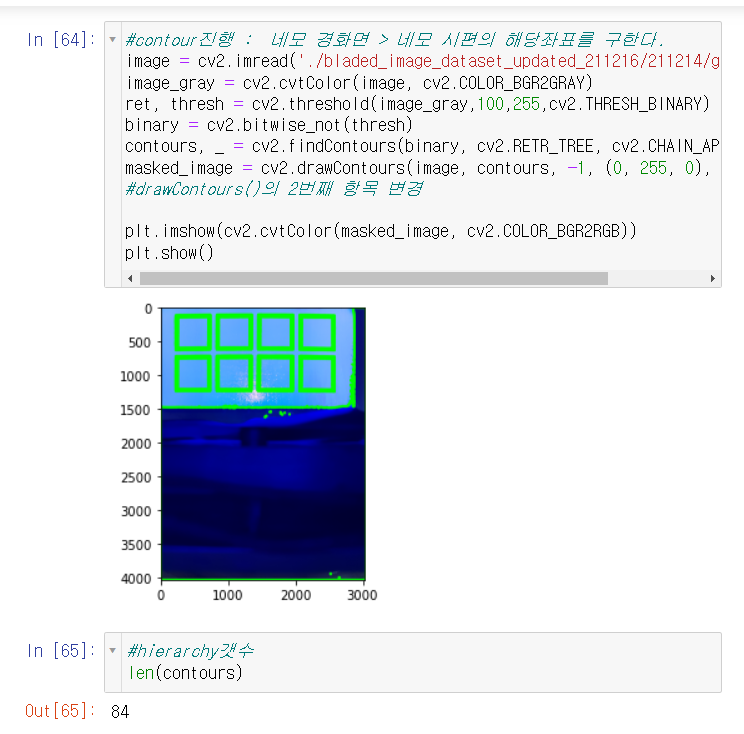

In [14]:
def crop_xy(a,b,c,d):

    guideline_img_copy = guideline_img.copy()
    guideline_crop = guideline_img_copy[a:b,c:d]
    cv_show(guideline_crop)

    return a,b,c,d, guideline_crop

In [15]:
crop_value = crop_xy(200,1500,200,2800)  #위 아래 왼 우

In [16]:
crop_img = crop_value[4]

In [17]:
cv_show(crop_img)

### mask show

#grayscale로 변환-종류확인
images = []
guideline_gray = cv2.cvtColor(guideline_img2, cv2.COLOR_BGR2GRAY)
ret,threshA = cv2.threshold(guideline_gray,127,255,cv2.THRESH_BINARY)
ret,threshB = cv2.threshold(guideline_gray,127,255,cv2.THRESH_BINARY_INV)
ret,threshC = cv2.threshold(guideline_gray,127,255,cv2.THRESH_TRUNC)
ret,threshD = cv2.threshold(guideline_gray,127,255,cv2.THRESH_TOZERO)
ret,threshE = cv2.threshold(guideline_gray,127,255,cv2.THRESH_TOZERO_INV)
images.append(threshA)
images.append(threshB)
images.append(threshC)
images.append(threshD)
images.append(threshE)

for i in images:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()


#적절한 임계값찾기
images2 = []
guideline_gray = cv2.cvtColor(guideline_img2, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(guideline_gray,25,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(guideline_gray,50,255,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(guideline_gray,75,255,cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(guideline_gray,100,255,cv2.THRESH_BINARY)
ret,thresh5 = cv2.threshold(guideline_gray,127,255,cv2.THRESH_BINARY)
binary1 = cv2.bitwise_not(thresh1)
binary2 = cv2.bitwise_not(thresh2)
binary3 = cv2.bitwise_not(thresh3)
binary4 = cv2.bitwise_not(thresh4)
binary5 = cv2.bitwise_not(thresh5)
images2.append(binary1)
images2.append(binary2)
images2.append(binary3)
images2.append(binary4)
images2.append(binary5)

for i in images2:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()

    #thresh4 마스크 채택

### contours 만들기

In [18]:
#모든 contours 표시
guideline_imgc=crop_img.copy()
guideline_gray = cv2.cvtColor(guideline_imgc, cv2.COLOR_BGR2GRAY)
ret,thresh3 = cv2.threshold(guideline_gray,60,255,cv2.THRESH_BINARY)
binary = cv2.bitwise_not(thresh3)
cv_show(binary)

In [19]:
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
guideline_mask = cv2.drawContours(guideline_imgc, contours, -1, (0, 0, 255), 15)

In [20]:
#contour개수 체크
print(len(contours))

15


In [44]:
cv_show(guideline_mask)

###  target이미지에 guide 입혀 저장

In [21]:
def contour_set(img_dir):
    now = time.strftime('%y%m%d')
    folder_name = f'./DLP_deepLearning/2_day_sorted_image(contoured)/new/{img_dir[-8:0]}'
    makedir(folder_name)
    for (path,dirs,files) in os.walk(img_dir):
        for file in files:
            print(file)
            img_open = cv2.imread(f'{img_dir}/{file}', cv2.IMREAD_COLOR)
            img_crop = img_open[int(crop_value[0]):int(crop_value[1]),int(crop_value[2]):int(crop_value[3])]
            img_target = img_crop.copy()
            guideline_mask2 = cv2.drawContours(img_target, contours, -1, (0, 0, 255), 15)
            cv2.imwrite(f'{folder_name}/{file}',guideline_mask2)

In [23]:
img_dir = 'C:/Users/PREMA-L/jinkyo_coding/DLP_deepLearning/1_day_sorted_image/220223_CE'

In [24]:
contour_set(img_dir)

made sub-dir
20220223_155139.jpg
20220223_155352.jpg
20220223_160016.jpg
20220223_160322.jpg
20220223_160934.jpg
20220223_161214.jpg
20220223_161457.jpg
20220223_161800.jpg
20220223_162040.jpg
20220223_162322.jpg
20220223_162630.jpg
20220223_162912.jpg
20220223_163153.jpg
20220223_163508.jpg
20220223_164007.jpg
20220223_164248.jpg
20220223_164529.jpg
20220223_164917.jpg
20220223_165212.jpg
20220223_165436.jpg
20220223_165719.jpg
20220223_170013.jpg
20220223_170329.jpg
20220223_170704.jpg
20220223_170946.jpg
20220223_171228.jpg
20220223_171511.jpg
20220223_171753.jpg
20220223_172035.jpg
20220223_172317.jpg
20220223_172559.jpg
20220223_172840.jpg
20220223_173123.jpg
guideline.jpg


### crop 꼭지점 구하기

In [25]:
def con_area(contours):
    contour_list = []
    for i in range(len(contours)):
        if cv2.contourArea(contours[i])>15000:
            contour_list.append(i)
    return contour_list

In [26]:
contour_list=con_area(contours)  #일정면적이상 contour

In [27]:
print(contour_list)

[6, 7, 9, 10, 11, 12, 13, 14]


guideline_img2 = crop_img.copy()
guide_mask = cv2.drawContours(guideline_img2, contours, 706, (0, 0, 255), 15)
cv_show(guide_mask)

### contour min&max 좌표 구하기
*crop하기위한 x,y 최소,최대 좌표값 구하기
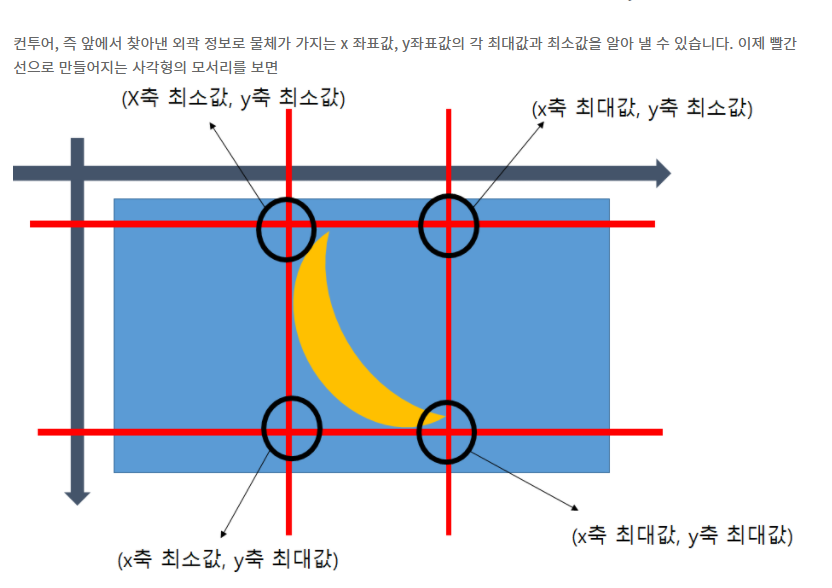

In [28]:
def make_point(contour_list):
    min_x_list=[]
    min_y_list=[]
    max_x_list=[]
    max_y_list=[]
    for i in contour_list :
            contour = np.array(contours[i])
            
            min_v = np.min(contour, axis=0)
            min_x = min_v[0][0]
            min_y = min_v[0][1]
            min_x_list.append(min_x)
            min_y_list.append(min_y)

            max_v = np.max(contour, axis=0)
            max_x = max_v[0][0]
            max_y = max_v[0][1]
            max_x_list.append(max_x)
            max_y_list.append(max_y)
    return (min_x_list, min_y_list, max_x_list, max_y_list)

In [29]:
pole_point = make_point(contour_list)
print(pole_point)

([127, 725, 1908, 1319, 123, 1891, 717, 1307], [690, 686, 682, 681, 109, 108, 106, 105], [638, 1232, 2407, 1823, 627, 2386, 1220, 1810], [1198, 1191, 1174, 1183, 604, 590, 594, 590])


guideline_img3 = guideline_img2[pole_point[1][1]:pole_point[3][1],pole_point[0][1]:pole_point[2][1]]
cv_show(guideline_img3)

### 좌표로 crop, resize후 저장

네모경화면으로 crop한 이미지를 
'(출력일자)_(레진종류)_(적층 층)' 명으로 '경화표면 이미지 폴더'저장

In [30]:
def makecrop1(img_dir):
    make_ad = f'./DLP_deepLearning/3_cropped/cropped{img_dir[-10:-1]}'
    makedir(make_ad)
    for (path,dirs,files) in os.walk(img_dir):
        for file in files:
            img_open = cv2.imread(f'{img_dir}/{file}', cv2.IMREAD_COLOR)
            img_crop = img_open[0:1400,100:2700]
            img_target = img_crop.copy()
            #cv2.imwrite(f'{make_ad}/{file}',img_target) #크롭된 전면 저장하기
            
            for i in range(len(contour_list)):
                crop = img_target[pole_point[1][i]:pole_point[3][i],pole_point[0][i]-100:pole_point[2][i]-100]
                crop = cv2.resize(crop, (512,512), interpolation =cv2.INTER_AREA)
                cv2.imwrite(f'{make_ad}/{file}_{i+1}.jpg', crop)

In [31]:
makecrop1('./DLP_deepLearning/2_day_sorted_image(contoured)/220223_CE(contoured)/')

made sub-dir


## lable매기기
### '(출력일자)_(레진종류)_(적층 층)_(위치숫자)_(label)' 명으로 'dataset 폴더'저장

In [32]:
def labling(folder):
    try:
        lable_dir = folder +'lable'
        makedir(lable_dir)
        for (path,dirs,files) in os.walk(folder):
            for file in files:
                img = cv2.imread(folder +'/'+ file, cv2.IMREAD_COLOR)
                cv2.imshow(f'make lable {file}', img)
                cv2.resizeWindow(f'make lable {file}', 512, 512)
                input = cv2.waitKey(0)
                cv2.imwrite(lable_dir +'/'+ file.rstrip('.jpg') +'_'+chr(input) +'.jpg', img)
                cv2.destroyAllWindows()
    except:
        print("done")

In [33]:
labling('./DLP_deepLearning/3_cropped/220223_CE_cropped/')

made sub-dir
done


### 끝자리에 따라 폴더로 이동하는 함수

In [4]:
print(classes)

('normal', 'reblading', 'pore', 'critical', 'error')


In [5]:
def movefile(class_dir):
    now = time.strftime('%y%m%d')
    folder = f"./DLP_deepLearning/4_dataset(class)/{now}_dataset(class)"
    makedir(folder)
    folder1 = f'{folder}/normal/'
    folder2 = f'{folder}/reblading/'
    folder3 = f'{folder}/pore/'
    folder4 = f'{folder}/critical/'
    folder5 = f'{folder}/error/'
    makedir(folder1)
    makedir(folder2)
    makedir(folder3)
    makedir(folder4)
    makedir(folder5)
    for (path,dirs,files) in os.walk(class_dir):
        for file in files:
            lable = file[-5]
            if lable == 'n':
                shutil.move(class_dir + '/' + file, folder1 + file)
            elif lable == 'r':
                shutil.move(class_dir + '/' + file, folder2 + file)
            elif lable == 'p':
                shutil.move(class_dir + '/' + file, folder3 + file)
            elif lable == 'c':
                shutil.move(class_dir + '/' + file, folder4 + file)
            elif lable == 'e':
                shutil.move(class_dir + '/' + file, folder5 + file)
            else:
                print('left some pictures')

            

In [6]:
movefile('./DLP_deepLearning/3_cropped/220223_CE_cropped/lable')  #마지막 / 없이

made sub-dir
made sub-dir
made sub-dir
made sub-dir
made sub-dir
made sub-dir


# Augmentation

### flipping

In [15]:
def flipping(file_dir):
    for (path,dirs,files) in os.walk(file_dir):
        for file in files:
            print(file)
            file_ad = file_dir + '/' + file
            file_bgr = cv2.imread(file_ad)
            #file_rgb = cv2.cvtColor(file_bgr, cv2.COLOR_BGR2RGB)
            LR_flip = cv2.flip(file_bgr, 1) # 1은 좌우 반전, 0은 상하 반전입니다.
            UD_flip = cv2.flip(file_bgr, 0)
            
            #makedir(file_dir+'/'+'LR_flipped')
            #cv2.imwrite(f'{file_dir}/LR_flipped/{file}_LR.jpg',LR_flip)
            
            makedir(file_dir+'/'+'UD_flipped')
            cv2.imwrite(f'{file_dir}/UD_flipped/{file}_UD.jpg',UD_flip)
        

In [16]:
flipping('./DLP_dataset/pore')

pore_0001.jpg
pore_0002.jpg
pore_0003.jpg
pore_0004.jpg
pore_0005.jpg
pore_0006.jpg
pore_0007.jpg
pore_0008.jpg
pore_0009.jpg
pore_0010.jpg
pore_0011.jpg
pore_0012.jpg
pore_0013.jpg
pore_0014.jpg
pore_0015.jpg
pore_0016.jpg
pore_0017.jpg
pore_0018.jpg
pore_0019.jpg
pore_0020.jpg
pore_0021.jpg
pore_0022.jpg
pore_0023.jpg
pore_0024.jpg
pore_0025.jpg
pore_0026.jpg
pore_0027.jpg
pore_0028.jpg
pore_0029.jpg
pore_0030.jpg
pore_0031.jpg
pore_0032.jpg
pore_0033.jpg
pore_0034.jpg
pore_0035.jpg
pore_0036.jpg
pore_0037.jpg
pore_0038.jpg
pore_0039.jpg
pore_0040.jpg
pore_0041.jpg
pore_0042.jpg
pore_0043.jpg
pore_0044.jpg
pore_0045.jpg
pore_0046.jpg
pore_0047.jpg
pore_0048.jpg
pore_0049.jpg
pore_0050.jpg
pore_0051.jpg
pore_0052.jpg
pore_0053.jpg
pore_0054.jpg
pore_0055.jpg
pore_0056.jpg
pore_0057.jpg
pore_0058.jpg
pore_0059.jpg
pore_0060.jpg
pore_0061.jpg
pore_0062.jpg
pore_0063.jpg
pore_0064.jpg
pore_0065.jpg
pore_0066.jpg
pore_0067.jpg
pore_0068.jpg
pore_0069.jpg
pore_0070.jpg
pore_0071.jpg
pore_0

pore_0591.jpg
pore_0592.jpg
pore_0593.jpg
pore_0594.jpg
pore_0595.jpg
pore_0596.jpg
pore_0597.jpg
pore_0598.jpg
pore_0599.jpg
pore_0600.jpg
pore_0601.jpg
pore_0602.jpg
pore_0603.jpg
pore_0604.jpg
pore_0605.jpg
pore_0606.jpg
pore_0607.jpg
pore_0608.jpg
pore_0609.jpg
pore_0610.jpg
pore_0611.jpg
pore_0612.jpg
pore_0613.jpg
pore_0614.jpg
pore_0615.jpg
pore_0616.jpg
pore_0617.jpg
pore_0618.jpg
pore_0619.jpg
pore_0620.jpg
pore_0621.jpg
pore_0622.jpg
pore_0623.jpg
pore_0624.jpg
pore_0625.jpg
pore_0626.jpg
pore_0627.jpg
pore_0628.jpg
pore_0629.jpg
pore_0630.jpg
pore_0631.jpg
pore_0632.jpg
pore_0633.jpg
pore_0634.jpg
pore_0635.jpg
pore_0636.jpg
pore_0637.jpg
pore_0638.jpg
pore_0639.jpg
pore_0640.jpg
pore_0641.jpg
pore_0642.jpg
pore_0643.jpg
pore_0644.jpg
pore_0645.jpg
pore_0646.jpg
pore_0647.jpg
pore_0648.jpg
pore_0649.jpg
pore_0650.jpg
pore_0651.jpg
pore_0652.jpg
pore_0653.jpg
pore_0654.jpg
pore_0655.jpg
pore_0656.jpg
pore_0657.jpg
pore_0658.jpg
pore_0659.jpg
pore_0660.jpg
pore_0661.jpg
pore_0

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [15]:
flipping('C:/Users/PREMA-L/jinkyo_coding/DLP_deepLearning/4_dataset(class)/220301_dataset(class)/normal')

20211214_222453.jpg_2_n.jpg
made sub-dir
made sub-dir
20211214_222802.jpg_2_n.jpg
20211214_222839.jpg_2_n.jpg
20211214_223418.jpg_2_n.jpg
20211214_223418.jpg_5_n.jpg
20211214_223418.jpg_8_n.jpg
20211214_223714.jpg_6_n.jpg
20211214_224041.jpg_1_n.jpg
20211214_224041.jpg_6_n.jpg
20211214_224349.jpg_2_n.jpg
20211214_224349.jpg_3_n.jpg
20211214_224349.jpg_6_n.jpg
20211214_224652.jpg_2_n.jpg
20211214_224652.jpg_6_n.jpg
20211214_224916.jpg_2_n.jpg
20211214_224916.jpg_3_n.jpg
20211214_224916.jpg_6_n.jpg
20211214_225150.jpg_2_n.jpg
20211214_225150.jpg_6_n.jpg
20211214_225444.jpg_2_n.jpg
20211214_225444.jpg_6_n.jpg
20211214_225728.jpg_2_n.jpg
20211214_225728.jpg_6_n.jpg
20211214_225952.jpg_2_n.jpg
20211214_225952.jpg_6_n.jpg
20211214_230230.jpg_6_n.jpg
20211214_230555.jpg_2_n.jpg
20211214_230555.jpg_6_n.jpg
20211214_230816.jpg_2_n.jpg
20211214_230816.jpg_6_n.jpg
20211214_230816.jpg_7_n.jpg
20211214_230816.jpg_8_n.jpg
20211214_231150.jpg_2_n.jpg
20211214_231150.jpg_6_n.jpg
20211214_231428.jpg_6_

20220217_132109.jpg_6_n.jpg
20220217_132109.jpg_7_n.jpg
20220217_132109.jpg_8_n.jpg
20220217_134315.jpg_1_n.jpg
20220217_134315.jpg_3_n.jpg
20220217_134315.jpg_4_n.jpg
20220217_134315.jpg_5_n.jpg
20220217_134315.jpg_6_n.jpg
20220217_134315.jpg_8_n.jpg
20220217_135643.jpg_1_n.jpg
20220217_135643.jpg_2_n.jpg
20220217_135643.jpg_3_n.jpg
20220217_135643.jpg_4_n.jpg
20220217_135643.jpg_5_n.jpg
20220217_135643.jpg_6_n.jpg
20220217_135643.jpg_8_n.jpg
20220217_135652.jpg_1_n.jpg
20220217_135652.jpg_2_n.jpg
20220217_135652.jpg_3_n.jpg
20220217_135652.jpg_4_n.jpg
20220217_135652.jpg_5_n.jpg
20220217_135652.jpg_6_n.jpg
20220217_135652.jpg_7_n.jpg
20220217_135652.jpg_8_n.jpg
20220217_135829.jpg_1_n.jpg
20220217_135829.jpg_2_n.jpg
20220217_135829.jpg_3_n.jpg
20220217_135829.jpg_4_n.jpg
20220217_135829.jpg_6_n.jpg
20220217_135829.jpg_7_n.jpg
20220217_140257.jpg_1_n.jpg
20220217_140257.jpg_2_n.jpg
20220217_140257.jpg_3_n.jpg
20220217_140257.jpg_4_n.jpg
20220217_140257.jpg_6_n.jpg
20220217_140257.jpg_

20220223_160322.jpg_3_n.jpg
20220223_160322.jpg_4_n.jpg
20220223_160322.jpg_5_n.jpg
20220223_160322.jpg_6_n.jpg
20220223_160322.jpg_7_n.jpg
20220223_160322.jpg_8_n.jpg
20220223_160934.jpg_1_n.jpg
20220223_160934.jpg_2_n.jpg
20220223_160934.jpg_3_n.jpg
20220223_160934.jpg_4_n.jpg
20220223_160934.jpg_5_n.jpg
20220223_160934.jpg_6_n.jpg
20220223_160934.jpg_7_n.jpg
20220223_160934.jpg_8_n.jpg
20220223_161214.jpg_1_n.jpg
20220223_161214.jpg_2_n.jpg
20220223_161214.jpg_3_n.jpg
20220223_161214.jpg_4_n.jpg
20220223_161214.jpg_5_n.jpg
20220223_161214.jpg_6_n.jpg
20220223_161214.jpg_7_n.jpg
20220223_161214.jpg_8_n.jpg
20220223_161457.jpg_1_n.jpg
20220223_161457.jpg_2_n.jpg
20220223_161457.jpg_3_n.jpg
20220223_161457.jpg_4_n.jpg
20220223_161457.jpg_5_n.jpg
20220223_161457.jpg_6_n.jpg
20220223_161457.jpg_7_n.jpg
20220223_161457.jpg_8_n.jpg
20220223_161800.jpg_1_n.jpg
20220223_161800.jpg_2_n.jpg
20220223_161800.jpg_3_p.jpg
20220223_161800.jpg_4_n.jpg
20220223_161800.jpg_5_n.jpg
20220223_161800.jpg_

In [16]:
flipping('C:/Users/PREMA-L/jinkyo_coding/DLP_deepLearning/4_dataset(class)/220301_dataset(class)/pore')

20211214_221915.jpg_1_p.jpg
made sub-dir
made sub-dir
20211214_221915.jpg_2_p.jpg
20211214_221915.jpg_3_p.jpg
20211214_221915.jpg_4_p.jpg
20211214_221915.jpg_5_p.jpg
20211214_221915.jpg_6_p.jpg
20211214_221915.jpg_7_p.jpg
20211214_221915.jpg_8_p.jpg
20211214_222214.jpg_1_p.jpg
20211214_222214.jpg_2_p.jpg
20211214_222214.jpg_3_p.jpg
20211214_222214.jpg_4_p.jpg
20211214_222214.jpg_5_p.jpg
20211214_222214.jpg_6_p.jpg
20211214_222214.jpg_7_p.jpg
20211214_222214.jpg_8_p.jpg
20211214_222453.jpg_1_p.jpg
20211214_222453.jpg_3_p.jpg
20211214_222453.jpg_4_p.jpg
20211214_222453.jpg_5_p.jpg
20211214_222453.jpg_6_p.jpg
20211214_222453.jpg_7_p.jpg
20211214_222453.jpg_8_p.jpg
20211214_222802.jpg_1_p.jpg
20211214_222802.jpg_3_p.jpg
20211214_222802.jpg_4_p.jpg
20211214_222802.jpg_5_p.jpg
20211214_222802.jpg_6_p.jpg
20211214_222802.jpg_7_p.jpg
20211214_222802.jpg_8_p.jpg
20211214_222839.jpg_1_p.jpg
20211214_222839.jpg_3_p.jpg
20211214_222839.jpg_4_p.jpg
20211214_222839.jpg_5_p.jpg
20211214_222839.jpg_6_

20211215_001959.jpg_2_p.jpg
20211215_001959.jpg_3_p.jpg
20211215_001959.jpg_4_p.jpg
20211215_001959.jpg_5_p.jpg
20211215_001959.jpg_7_p.jpg
20211215_001959.jpg_8_p.jpg
20211215_002223.jpg_1_p.jpg
20211215_002223.jpg_2_p.jpg
20211215_002223.jpg_3_p.jpg
20211215_002223.jpg_4_p.jpg
20211215_002223.jpg_5_p.jpg
20211215_002223.jpg_6_p.jpg
20211215_002223.jpg_8_p.jpg
20211215_002446.jpg_1_p.jpg
20211215_002446.jpg_4_p.jpg
20211215_002446.jpg_5_p.jpg
20211215_002446.jpg_7_p.jpg
20211215_002446.jpg_8_p.jpg
20211215_002657.jpg_1_p.jpg
20211215_002657.jpg_2_p.jpg
20211215_002657.jpg_3_p.jpg
20211215_002657.jpg_4_p.jpg
20211215_002657.jpg_5_p.jpg
20211215_002657.jpg_7_p.jpg
20211215_002657.jpg_8_p.jpg
20211215_002934.jpg_1_p.jpg
20211215_002934.jpg_3_p.jpg
20211215_002934.jpg_4_p.jpg
20211215_002934.jpg_5_p.jpg
20211215_002934.jpg_7_p.jpg
20211215_002934.jpg_8_p.jpg
20211215_003202.jpg_1_p.jpg
20211215_003202.jpg_3_p.jpg
20211215_003202.jpg_4_p.jpg
20211215_003202.jpg_5_p.jpg
20211215_003202.jpg_

20220223_122659.jpg_8_p.jpg
20220223_122941.jpg_3_p.jpg
20220223_122941.jpg_4_p.jpg
20220223_122941.jpg_5_p.jpg
20220223_122941.jpg_7_p.jpg
20220223_122941.jpg_8_p.jpg
20220223_124043.jpg_8_p.jpg
20220223_124338.jpg_1_p.jpg
20220223_124338.jpg_6_p.jpg
20220223_125923.jpg_8_p.jpg
20220223_131318.jpg_1_p.jpg
20220223_134202.jpg_1_p.jpg
20220223_135024.jpg_1_p.jpg
20220223_135024.jpg_2_p.jpg
20220223_135024.jpg_6_p.jpg
20220223_135917.jpg_6_p.jpg
20220223_142207.jpg_8_p.jpg
20220223_142452.jpg_8_p.jpg
20220223_142737.jpg_6_p.jpg
20220223_142737.jpg_8_p.jpg
20220223_143021.jpg_8_p.jpg
20220223_143318.jpg_2_p.jpg
20220223_143318.jpg_5_p.jpg
20220223_143318.jpg_7_p.jpg
20220223_143318.jpg_8_p.jpg
20220223_143600.jpg_5_p.jpg
20220223_143600.jpg_7_p.jpg
20220223_143600.jpg_8_p.jpg
20220223_143841.jpg_2_p.jpg
20220223_143841.jpg_3_p.jpg
20220223_143841.jpg_4_p.jpg
20220223_143841.jpg_5_p.jpg
20220223_143841.jpg_7_p.jpg
20220223_143841.jpg_8_p.jpg
20220223_144231.jpg_1_p.jpg
20220223_144231.jpg_

In [17]:
flipping('C:/Users/PREMA-L/jinkyo_coding/DLP_deepLearning/4_dataset(class)/220301_dataset(class)/reblading')

20211214_223132.jpg_5_c.jpg
made sub-dir
made sub-dir
20211214_223132.jpg_7_c.jpg
20211214_223132.jpg_8_c.jpg
20211214_224349.jpg_1_r.jpg
20211214_224652.jpg_1_r.jpg
20211214_224652.jpg_5_r.jpg
20211214_224652.jpg_8_r.jpg
20211214_224916.jpg_1_r.jpg
20211214_224916.jpg_5_r.jpg
20211214_225150.jpg_1_r.jpg
20211214_225444.jpg_1_r.jpg
20211214_225444.jpg_5_r.jpg
20211214_225728.jpg_1_r.jpg
20211214_225728.jpg_5_r.jpg
20211214_230816.jpg_5_r.jpg
20211215_003202.jpg_2_r.jpg
20211215_011114.jpg_2_r.jpg
20211228_144651.jpg_5_r.jpg
20211228_151032.jpg_8_r.jpg
20211228_151216.jpg_2_r.jpg
20211228_151216.jpg_8_r.jpg
20211228_151359.jpg_1_r.jpg
20211228_151359.jpg_8_r.jpg
20211228_151408.jpg_2_r.jpg
20211228_151408.jpg_3_r.jpg
20211228_151408.jpg_5_r.jpg
20211228_151408.jpg_6_r.jpg
20211228_151727.jpg_5_r.jpg
20211228_152817.jpg_8_r.jpg
20211228_153128.jpg_2_r.jpg
20211228_153353.jpg_2_r.jpg
20211228_153353.jpg_5_r.jpg
20211228_153353.jpg_6_r.jpg
20211228_153353.jpg_8_r.jpg
20211228_153635.jpg_5_

In [19]:
flipping('C:/Users/PREMA-L/jinkyo_coding/DLP_deepLearning/4_dataset(class)/220301_dataset(class)/error')

20220216_170349.jpg_1_e.jpg
made sub-dir
made sub-dir
20220216_170349.jpg_2_e.jpg
20220216_170349.jpg_3_e.jpg
20220216_170349.jpg_4_e.jpg
20220216_170349.jpg_5_e.jpg
20220216_170349.jpg_6_e.jpg
20220216_170349.jpg_7_e.jpg
20220216_170349.jpg_8_e.jpg
20220216_181919.jpg_1_e.jpg
20220216_181919.jpg_2_e.jpg
20220216_181919.jpg_3_e.jpg
20220216_181919.jpg_4_e.jpg
20220216_181919.jpg_5_e.jpg
20220216_181919.jpg_6_e.jpg
20220216_181919.jpg_7_e.jpg
20220216_181919.jpg_8_e.jpg
20220216_182542.jpg_1_e.jpg
20220216_182542.jpg_2_e.jpg
20220216_182542.jpg_3_e.jpg
20220216_182542.jpg_4_e.jpg
20220216_182542.jpg_5_e.jpg
20220216_182542.jpg_6_e.jpg
20220216_182542.jpg_7_e.jpg
20220216_182542.jpg_8_e.jpg
20220217_140016.jpg_1_e.jpg
20220217_140016.jpg_2_e.jpg
20220217_140016.jpg_3_e.jpg
20220217_140016.jpg_4_e.jpg
20220217_140016.jpg_5_e.jpg
20220217_140016.jpg_6_e.jpg
20220217_140016.jpg_7_e.jpg
20220217_140016.jpg_8_e.jpg
20220217_142837.jpg_1_e.jpg
20220217_142837.jpg_2_e.jpg
20220217_142837.jpg_3_

# dataset split

In [4]:
import splitfolders #pip install split-folders
import os

In [5]:
print(classes)

('normal', 'reblading', 'pore', 'critical', 'error')


In [6]:
normal_list = os.listdir('./dataset(class)/normal')
reblading_list = os.listdir('./dataset(class)/reblading')
pore_list = os.listdir('./dataset(class)/pore')
critical_list = os.listdir('./dataset(class)/critical')
error_list = os.listdir('./dataset(class)/error')

In [7]:
len(normal_list)+len(reblading_list)+len(pore_list)+len(critical_list)+len(error_list)

4843

In [8]:
#train, validation, test 로 분할하기
splitfolders.ratio("./dataset(class)/", output = './dataset(tr,val,test)', seed=4843, ratio=(0.6,0.2,0.2))

Copying files: 4843 files [00:08, 573.58 files/s]


In [32]:
train_list1= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/train/normal/')
train_list2= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/train/reblading/')
train_list3= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/train/pore/')
train_list4= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/train/critical/')
train_list5= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/train/error/')


val_list1=os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/val/normal/')
val_list2=os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/val/reblading/')
val_list3=os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/val/pore/')
val_list4=os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/val/critical/')
val_list5=os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/val/error/')

test_list1= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/test/normal/')
test_list2= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/test/reblading/')
test_list3= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/test/pore/')
test_list4= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/test/critical/')
test_list5= os.listdir('./DLP_deepLearning/5_dataset(tr,val,test)/test/error/')

In [33]:
train_n = len(train_list1)+len(train_list2)+len(train_list3)+len(train_list4)+len(train_list5)
val_n = len(val_list1)+len(val_list2)+len(val_list3)+len(val_list4)+len(val_list5)
test_n = len(test_list1)+len(test_list2)+len(test_list3)+len(test_list4)+len(test_list5)

print(train_n,val_n, test_n)
print(train_n+test_n+val_n)

2913 969 977
4859


## 파일명에 '.jpg'빼기

In [18]:
class_dir='C:/coding/DLP_auto/DLP_dataset/'
for (path,dirs,files) in os.walk(class_dir):
    for file in files:
        re_file = file.replace('.jpg','')+'.jpg'
        os.rename(class_dir+file, class_dir+re_file)

## 파일명에 'UD' 있으면 삭제

In [18]:
class_dir='C:/Users/PREMA-L/jinkyo_coding/DLP_deepLearning/5_220301_dataset/pore/'
for (path,dirs,files) in os.walk(class_dir):
    for file in files:
        index = file.find('UD')
        if index != -1:
            os.remove(class_dir+file)

## 3.3 파일명 csv로 추출

In [3]:
import os
import csv

f = open('output.csv', 'w', encoding='utf-8', newline='')
wr = csv.writer(f)
classes = ["normal", "critical", "error", "pore", "minor_defect"]


class_dir = f'C:/coding/DLP_auto/DLP_dataset/'
for (path,dirs,files) in os.walk(class_dir):
    for file in files:
        for i in range(5):
            if classes[i] in file:
                wr.writerow([file, i])
        

In [9]:
### 논문 데이터
import cv2
import os

img = cv2.imread('C:/coding/DLP_auto/pore_0435.jpg')

In [12]:
cv_show(img)

In [13]:
import torchvision.transforms as transforms

In [ ]:
trans = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize(224), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [14]:
resize_img = cv2.resize(img, (224,224))

In [15]:
cv2.imwrite("resize224.jpg", resize_img)

True